## Start Jupyter notebook on Nova on demand.

You can start Jupyter notebook on Nova on demand. This will allow you to run Jupyter notebook on the server and access it from your local machine.

1. Go to the [Nova OnDemand](https://nova-ondemand.its.iastate.edu/) and login
2. Under the "Interactive Apps" tab, click on "Jupyter Notebook", request desired resources and click "Launch"
3. Wait for the job to start and click on the "Connect to Jupyter" button



# Import Libraries

To begin, we need to import the necessary libraries.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Pandas working with TSV file

For this exercise, we will use a different version of the ecological dataset from our previous lessons. This version has only the complete observations, without missing entries for any of the columns. There are also a few additional columns providing information about the taxonomy of the species collected and the type of plot/enclosure.

In [7]:
file_path = 'surveys_complete.csv'
surveys = pd.read_csv(file_path, index_col=0)
sns.set()

By default, Seaborn applies a clean and informative set of plot aesthetics; however, you may want to customize the appearance — for example, changing the background style or adjusting the font size for clarity. To do this, you can use the `sns.set()` function. If this method is called without any arguments, it will return to the default, which changes the background color to gray and overlays white grid lines (i.e., a similar background to ggplot2 in R). We can add an argument to also change the font size for all of our downstream figures:

## A Simple Scatterplot

We will start by creating a basic scatterplot to visualize the relationship between weight and hindfoot length. The x-axis will represent weight, and the y-axis will represent hindfoot length. For this, we will use the generic `sns.relplot` and invoke `kind=scatter`. Remember, there are a variety of different plots we can use, and a variety of "kinds" we can call within those plots.

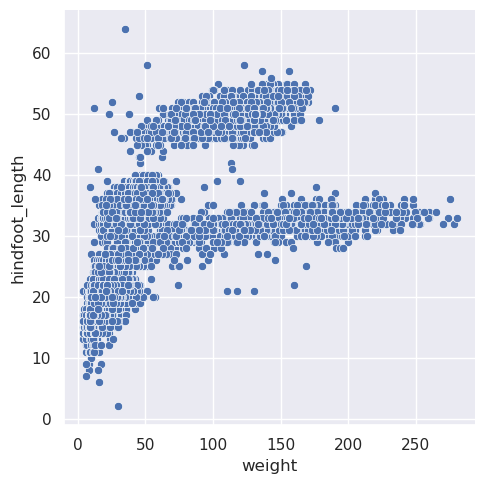

In [19]:
sns.relplot(x="weight", y="hindfoot_length", data=surveys, kind="scatter");
plt.show()

The plot size is small by default, and (in Seaborn) there isn’t a way to globally change the plot size. Further, this is done differently depending on the plot function. Some functions return matplotlib objects; others are drawn using a grid object.

For `.relplot()`, we can set the plot size directly as arguments using the size and aspect arguments. These arguments control the height and width of the object, respectively. If we did this using `sns.scatterplot`, we would have to do this with `plt.figure(figsize=(width, height))` before drawing the figure because it does not directly take these as arguments.

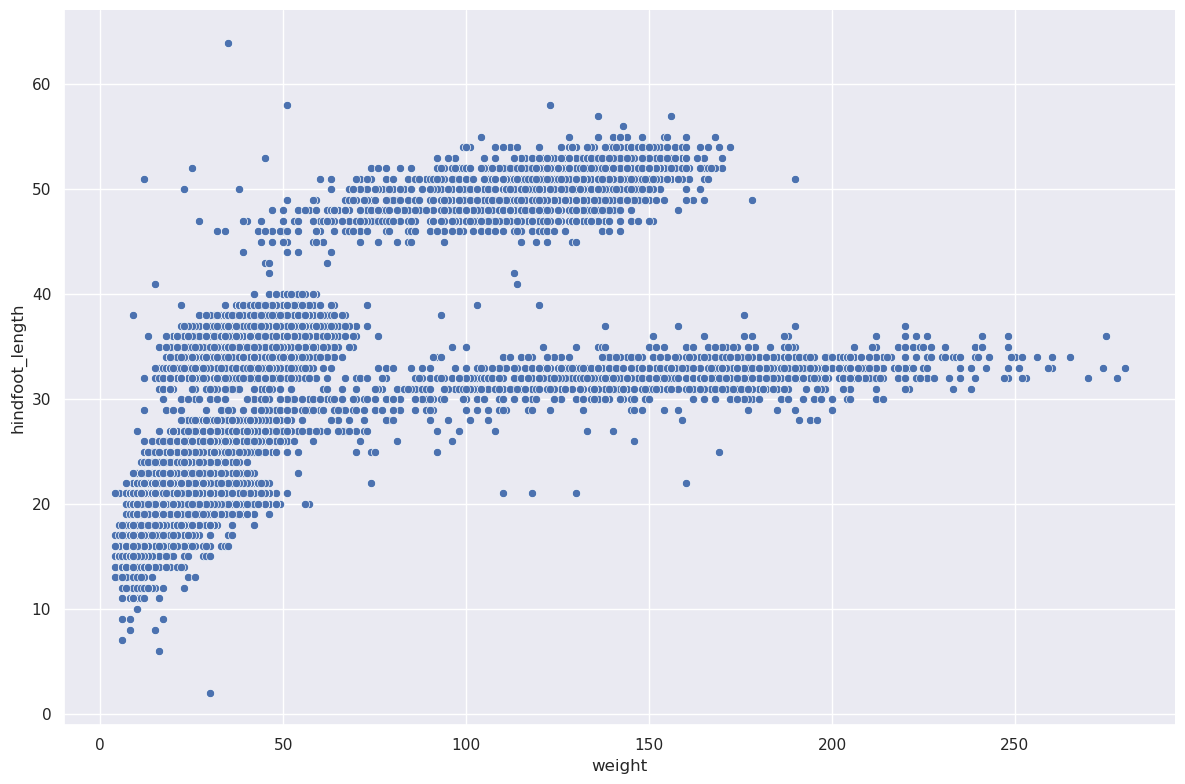

In [20]:
sns.relplot(x="weight", y="hindfoot_length", data=surveys, kind="scatter", height=8, aspect=1.5)

## Changing marker aesthetics

One issue with this plot is that because we have a large dataset, it is difficult to adequately visualize the points on our graph. This is called “overplotting”. One way to avoid this is to change the size of the marker. Here we use the argument scatter_kws that takes a dictionary of keywords and values that are passed to the matplotlib scatter function.

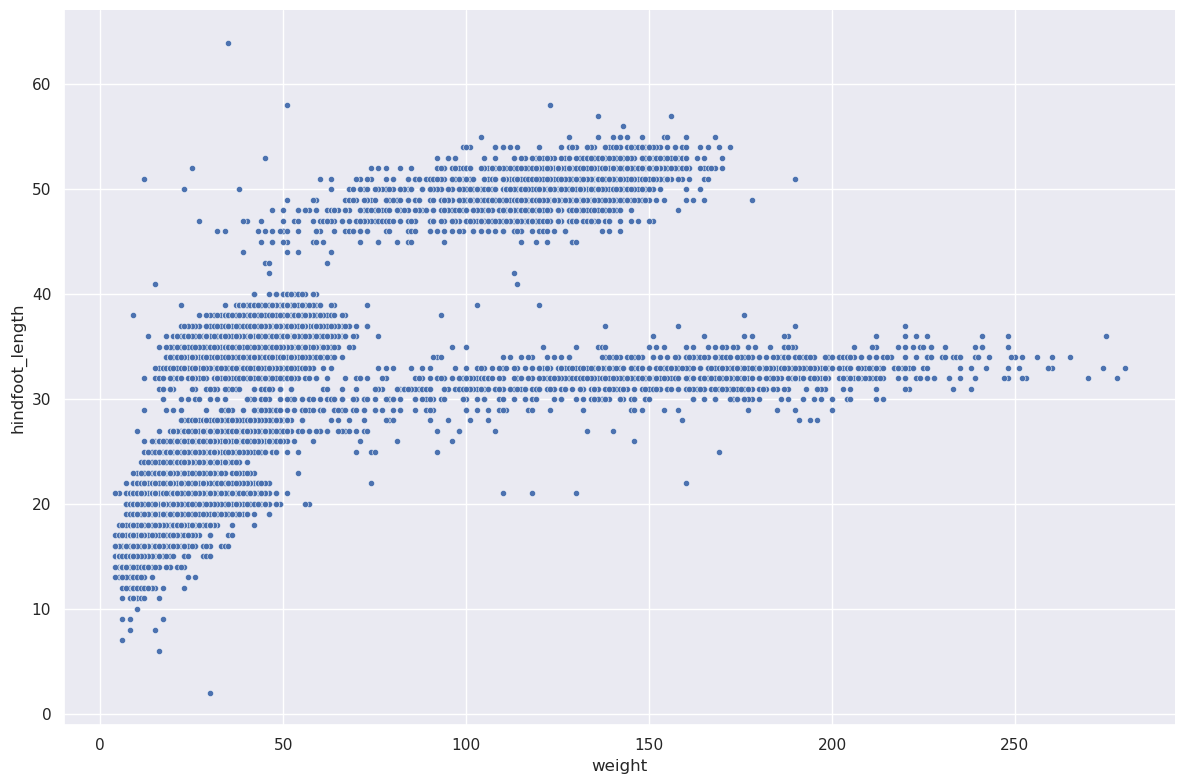

In [25]:
sns.relplot(x="weight", y="hindfoot_length", data=surveys, kind="scatter", height=8, aspect=1.5, s=20)
# here we changed the size from 40 (default) to 20; size is area of dot in points

Another way to avoid overplotting is to use transparency so that regions of the plot with many points are darker. This is achieved using the alpha argument, which ranges from 0.0 to 1.0 (for complete transparency, `alpha=0` -- makes it invisible; `alpha=1` for complete opacity).

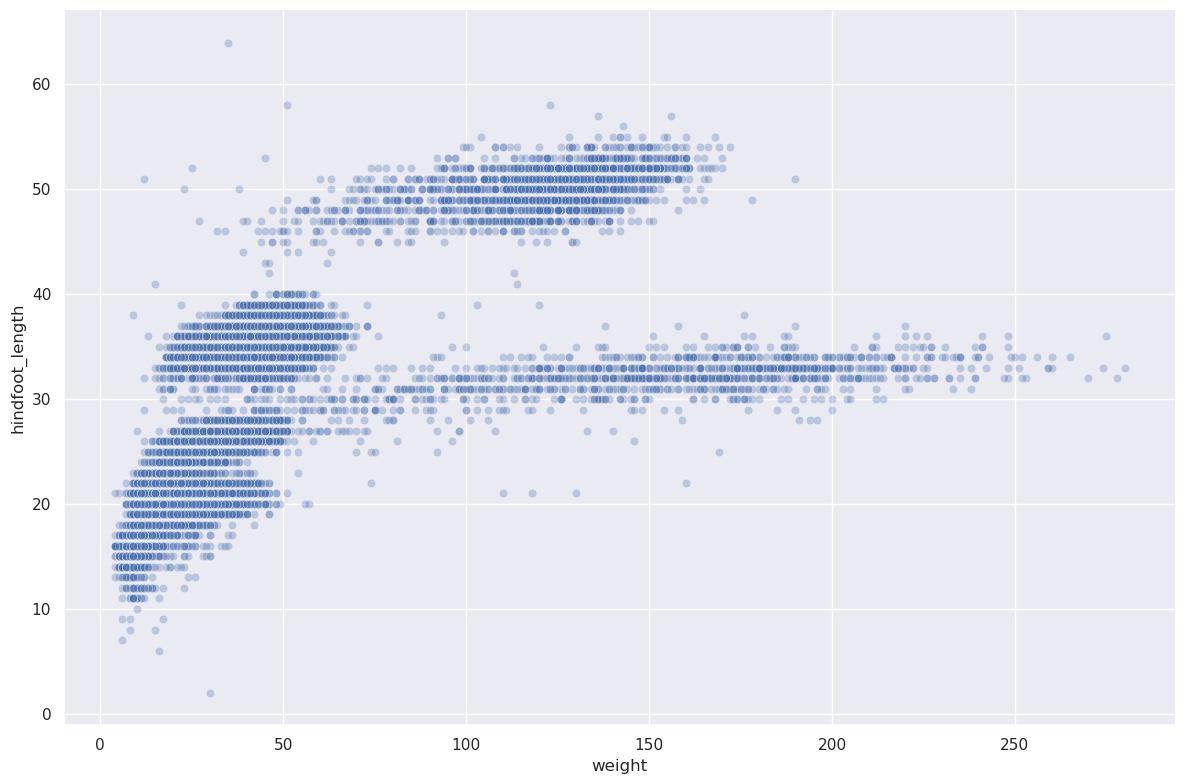

In [28]:
sns.relplot(x="weight", y="hindfoot_length", data=surveys, kind="scatter", height=8, aspect=1.5, alpha=0.3)

## Coloring markers by a categorical value

We can also color our plots by species_id labels (as categories)

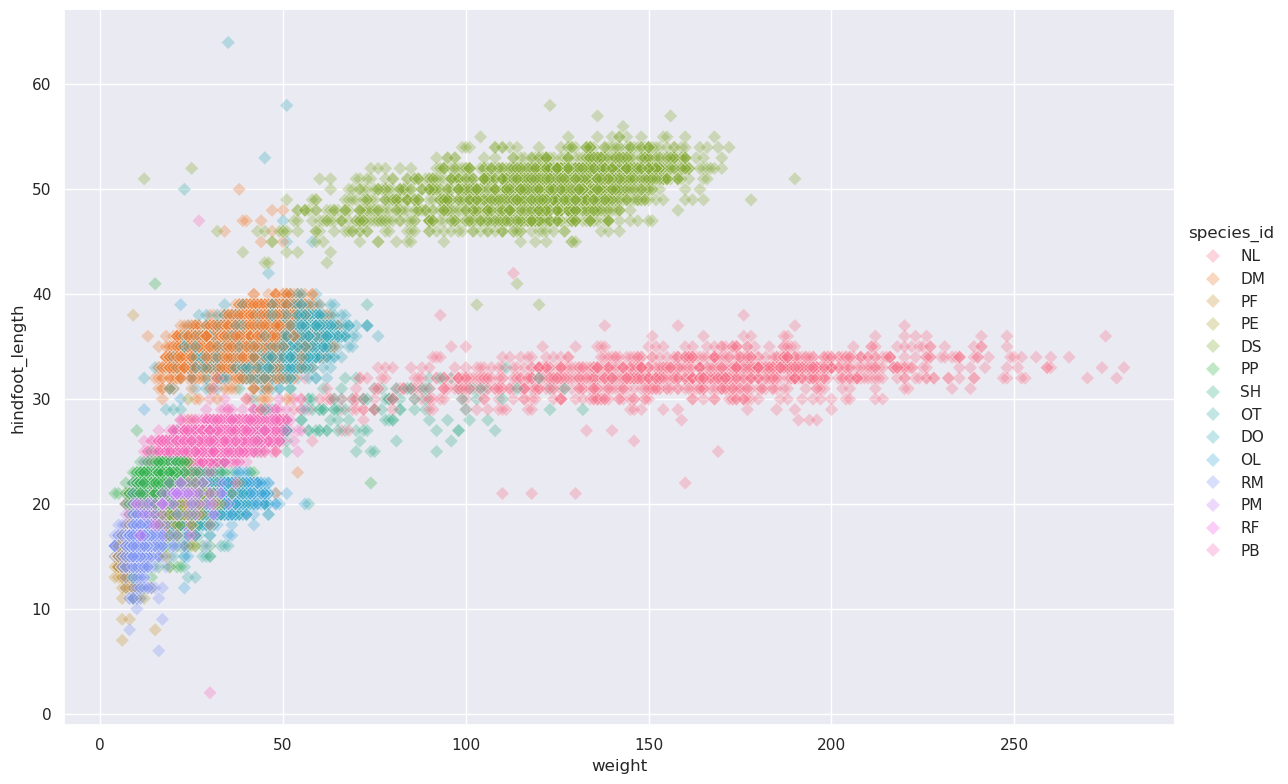

In [30]:
sns.relplot(x="weight", y="hindfoot_length", data=surveys,
            hue="species_id", kind="scatter", height=8, 
            aspect=1.5, marker='D', s=50, alpha=0.3)
# here I have added a hue to divide categories and changed "marker" to Diamond

## Setting the axis labels

Seaborn offers multiple ways to customize figure properties. When using `.relplot()`, you can assign the plot to a variable and use its built-in methods (*i.e.*, `.set_axis_labels()`) to set the x- and y-axis labels.

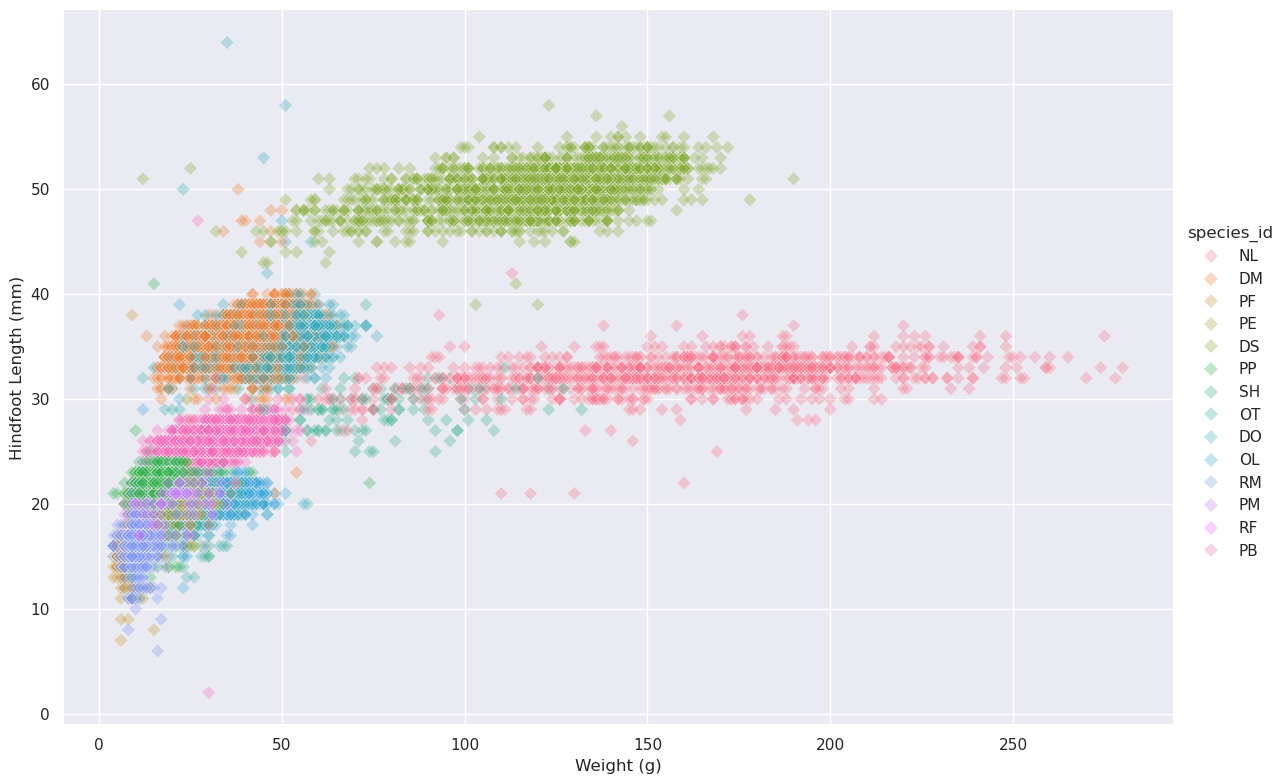

In [31]:
my_fig = sns.relplot(x="weight", y="hindfoot_length", data=surveys, 
                     kind="scatter", height=8, aspect=1.5, hue="species_id",
                     marker="D", s=50, alpha=0.3 )
my_fig.set_axis_labels('Weight (g)', 'Hindfoot Length (mm)')
plt.show()

# Box Plots & Violin Plots
When comparing the distributions of a numerical variable across categories, box plots and violin plots are commonly used for their simplicity and effectiveness.

In Seaborn, the `.boxplot()` and `.violinplot()` functions return Matplotlib Axes objects. Unlike figure-level functions such as relplot(), these functions do not accept height and aspect arguments. *Note: we can add those back in using .catplot(kind="box"), etc.*

We might be making several related plots and instead want to set the height and width globally. To adjust the size of these plots, we need to explicitly create a Matplotlib figure and set its dimensions. To maintain consistency across our plots, we’ll define a tuple variable to store our preferred figure size.

In [40]:
plot_dims = (7, 4.5)

Now, every time we create a new plot that returns a matplotlib Axes object, we can call the same `.subplots()` function to always create the same dimensions (`plot_dims`) for our figures. Because of the iteritve way in which figures are built using matplotlib,  it’s important to create the figure and generate the plot within the same notebook cell to avoid unexpected behavior or overlapping plots.

[Text(0.5, 0, 'Species ID'), Text(0, 0.5, 'Hindfoot Length (mm)')]

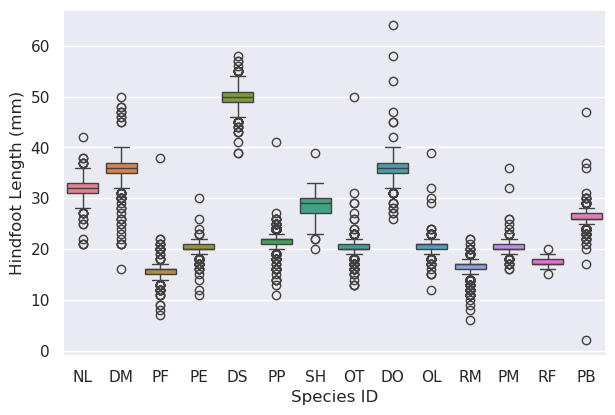

In [41]:
fig, ax = plt.subplots(figsize=plot_dims) # set the dimensions
sns.boxplot(x='species_id', y='hindfoot_length', data=surveys, hue='species_id') # make the plot
ax.set(xlabel='Species ID', ylabel='Hindfoot Length (mm)') # relabel the axes

Now let’s use a violin plot to visualize the weight data. For these data, we would like to display weight on a log<sub>10</sub> scale. Since we want this plot horizontal, we’ll apply the log transformation to the x-axis. A convenient way to do this is to assign our graph to a variable and then call the `.set_xscale()` method on that variable.

[Text(0, 0.5, 'Species ID'), Text(0.5, 0, 'Weight (g)')]

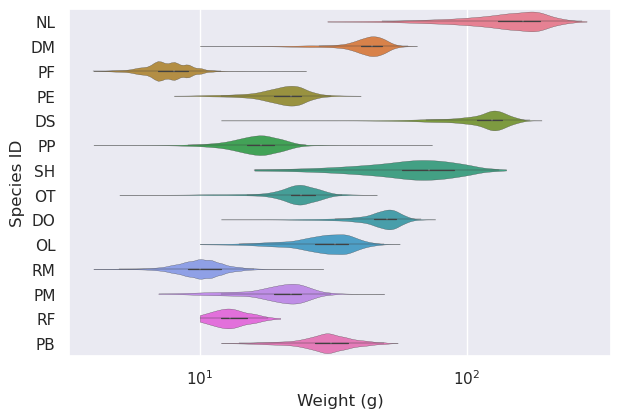

In [42]:
fig, ax = plt.subplots(figsize=plot_dims)
g = sns.violinplot(x='weight', y='species_id', data=surveys, hue='species_id',
                   linewidth=0.2, orient="h", cut=0)
g.set_xscale('log', base=10)
ax.set(ylabel='Species ID', xlabel='Weight (g)')

# Histograms

Sometimes a histogram will be more appropriate, *e.g.*, in visualizing the distribution of a single variable. This can be done easily using Seaborn’s `.displot()` function. Unlike some other Seaborn functions, `.displot()` does not take in an entire DataFrame. Instead, it expects a single Pandas Series (e.g., a single column from your DataFrame; `df['column']`).

You can also customize the plot using additional arguments. For example, the color parameter accepts any valid Matplotlib color code. In our case, we’ll use `color='c'` to make the histogram cyan. We’ll also set bins=50 to control the number of bins used, ensuring the histogram isn’t too coarse or too detailed.

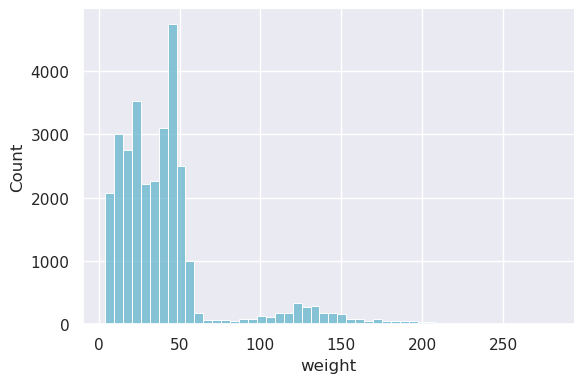

In [45]:
sns.displot(surveys['weight'], color='c',bins=50, 
            height=4, aspect=1.5)

By default, `.displot()` plots the density as a histogram (`kind="hist"`); however, you can plot a kernel density estimate instead using `kind="kde"` and removing the bins argument.

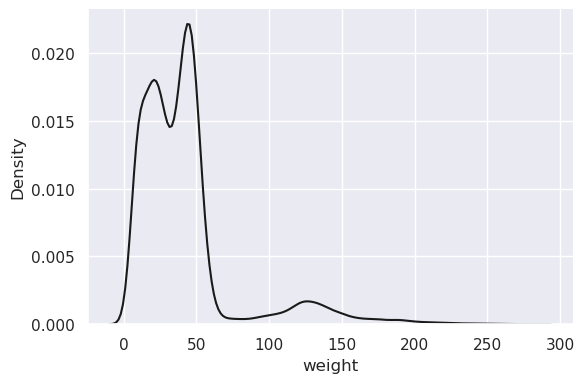

In [49]:
sns.displot(surveys['weight'], color='k', kind="kde", # 'k' is shorthand for black
            height=4, aspect=1.5)

Notably, you can combine both the histogram and kde together like this:

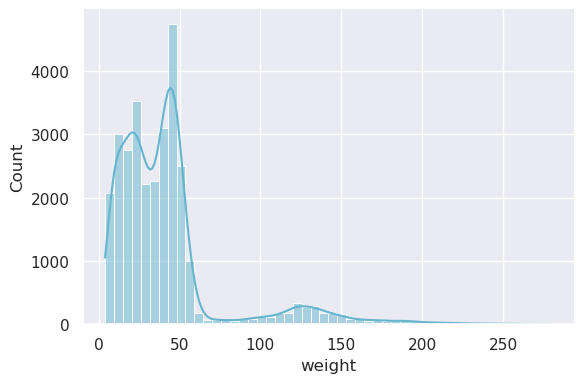

In [51]:
sns.displot(data=surveys, x="weight", kind="hist", # here I used x= instead of extracting the column
            bins=50, color="c", kde=True,  # Adds the KDE curve
            height=4, aspect=1.5)

# Plotting with bokeh

Another library called bokeh can create amazing, interactive graphics using D3.js (javascript). This package is easy to install through our Jupyter notebook. Simply call 

`%pip install -q bokeh` 

We install with -q to make it do it quietly!

In [52]:
%pip install -q bokeh

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

Here, we're importing the necessary functions to create a figure and display it directly in our Jupyter notebook.

By calling output_notebook(), we enable Bokeh to render interactive plots inline within the notebook as JavaScript-powered visualizations embedded in the HTML output.

In [54]:
output_notebook()

Loading BokehJS ...

We can reproduce the histogram of the weights of all our observations. I will show you the code, but we will not go over how to use bokeh since it is less common -- this is more for your reference if you encounter a need for it!

In [57]:
hist, edges = np.histogram(surveys['weight'], density=True, bins=100)
my_fig = figure(title="Weight (g)",background_fill_color="yellow")
my_fig.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],fill_color="darkred", line_color="#033649")
show(my_fig)

We can save this figure as an interactive html file that we can publish in our supplementary data or on the web. First, we need to include some other bokeh functions:

In [58]:
from bokeh.resources import CDN
from bokeh.embed import file_html

Now we can create an html object and save it to a file using standard Python file i/o:

In [59]:
html = file_html(my_fig, CDN, "Weight Histogram")
out = open('weight_hist_bokeh.html','w')
out.write(html)
out.close()